## Initial Setup

In [1]:
# Establish search path and import local utilities module
""" This includes: 
    get_data_path(), get_csv_file(data_path, file_name), 
    display_file_summary(data_frame, name=""), display_file_stats(data_frame, name="")
"""
import sys
sys.path.append("/Users/stuartgow/GitHub/Python_Snippets/Utilities")
import SGfilehandling as files

# Import typically used packages
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import plotting packages
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.style.use('default')

In [2]:
def quick_plot(column):
    fig, ax = plt.subplots(figsize =(10, 5))
    counts = column.value_counts()
    bars = plt.barh(counts.index, counts.values, color='blue')
    ax.bar_label(bars, fmt='%d', padding=3) 
    plt.show()

In [3]:
# CSV File Data Load to a Pandas dataframe & Initial Examination
# The 'Data' folder one level above the project 
data_path = files.get_data_path()   
file_name="wallacecommunications.csv"

df = files.get_csv_file(data_path, file_name=file_name)

print(f'File Contents. {file_name}')
display(df.head())
files.display_file_summary(df, name=file_name)
files.display_file_stats(df, name=file_name)

File Contents. wallacecommunications.csv


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


File Details. wallacecommunications.csv


,Count,Missing,Empty,Unique,Top,Freq,Type,String,Int,Float,Bool,List,Other
ID,50662,0,0,50644,80354425,2,int64,0,50662,0,0,0,0
town,50662,0,0,101,London,3241,object,50662,0,0,0,0,0
country,50662,0,0,5,UK,50657,object,50662,0,0,0,0,0
age,50662,0,0,76,32,2273,int64,0,50662,0,0,0,0
job,50662,0,0,12,management,10849,object,50662,0,0,0,0,0
married,50662,0,0,3,married,30045,object,50662,0,0,0,0,0
education,50662,0,0,4,secondary,25779,object,50662,0,0,0,0,0
arrears,50662,0,0,2,no,49794,object,50662,0,0,0,0,0
current_balance,50662,0,0,6928,0.0,3836,float64,0,0,50662,0,0,0
housing,50662,0,0,2,yes,27250,object,50662,0,0,0,0,0


File Stats For Numerics. wallacecommunications.csv


,count,mean,std,min,25%,50%,75%,max
ID,50662.00,55028712.75,25985959.78,10000726.00,32499637.25,55011272.00,77488092.25,99999515.00
age,50662.00,40.98,10.92,18.00,32.00,39.00,48.00,95.00
current_balance,50662.00,13.99,30.90,-80.19,0.82,4.72,14.95,984.17
conn_tr,50662.00,3.01,1.41,1.00,2.00,3.00,4.00,5.00
last_contact_this_campaign_day,50662.00,15.77,8.35,1.00,8.00,16.00,21.00,31.00
this_campaign,50662.00,2.71,3.05,1.00,1.00,2.00,3.00,63.00
days_since_last_contact_previous_campaign,50662.00,42.64,102.24,-1.00,-1.00,-1.00,-1.00,871.00
contacted_during_previous_campaign,50662.00,0.64,2.36,0.00,0.00,0.00,0.00,275.00


## Data Cleaning

Comments / Results:


- has tv package - 3 values
- conn_tr - understand this grouping
- last contact - combine month and day into a date field?
- this_campaign - are there some unusually high values for number of contacts?
- contacted_during_previous_campaign - ditto
- outcome_previous_campaign - 4 different outcome categories?



In [4]:
customers_cleaned = df.copy()

In [5]:
# Data Cleaning - Variable by Variable

# ID - Identify duplicates - But leave as won't impact the predictions
duplicated = customers_cleaned[customers_cleaned.duplicated(keep=False, subset=['ID'])]
print(f'Duplicates: {duplicated.shape[0]}')
#display(duplicated.iloc[:, :7].sort_values(by='ID'))




Duplicates: 36


In [ ]:
# Country - Some incorrect countries, change so All are UK
display(customers_cleaned[customers_cleaned['country'] != 'UK'])
customers_cleaned['country'] = 'UK'
display(customers_cleaned[customers_cleaned['country'] != 'UK'])

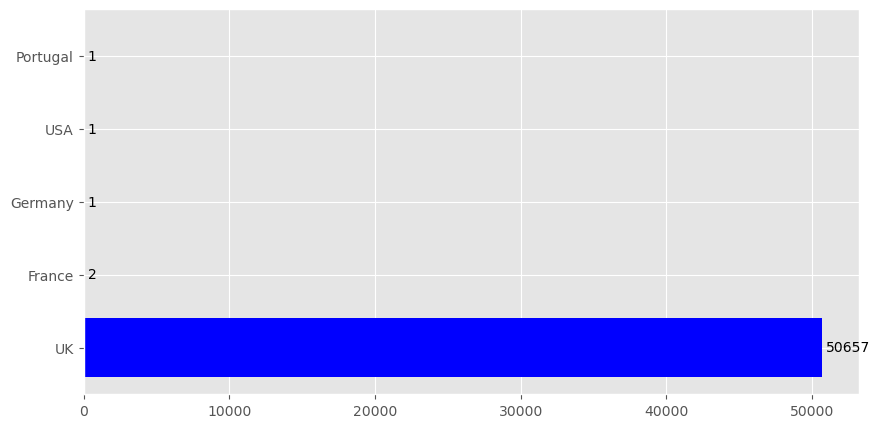

In [6]:
quick_plot(customers_cleaned['country'])

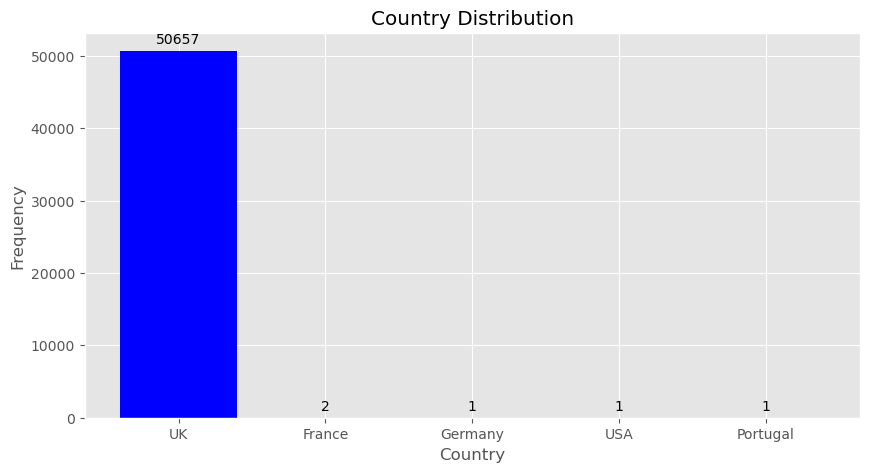

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
counts = customers_cleaned['country'].value_counts()
    
bars = ax.bar(counts.index, counts.values, color='blue')
ax.bar_label(bars, fmt='%d', padding=3)
    
ax.set_xlabel('Country')
ax.set_ylabel('Frequency')
ax.set_title('Country Distribution')
    
plt.show()

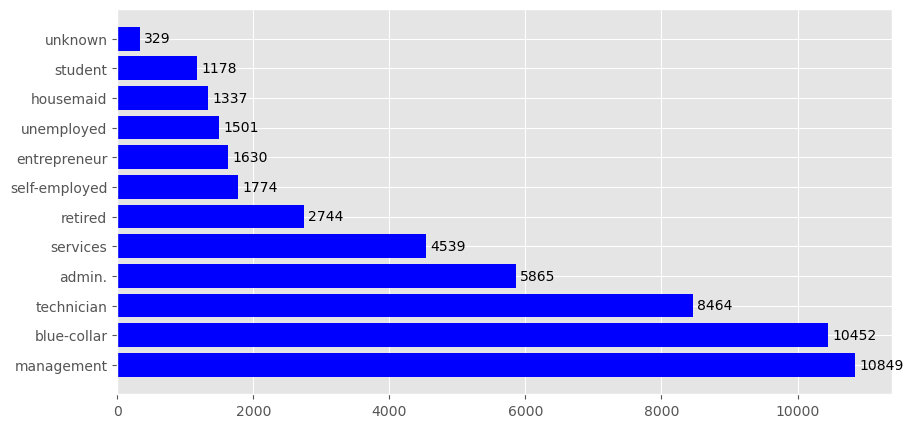

In [7]:
quick_plot(customers_cleaned['job'])

In [ ]:
quick_plot(customers_cleaned['married'])
quick_plot(customers_cleaned['education'])
quick_plot(customers_cleaned['arrears'])

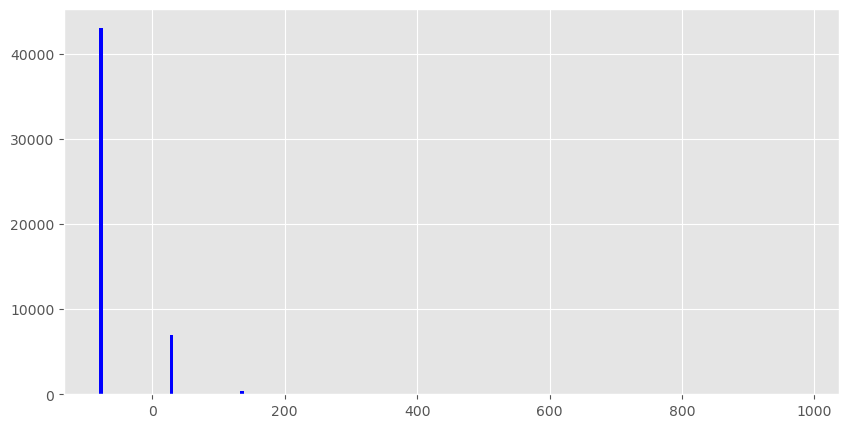

In [9]:
fig, ax = plt.subplots(figsize =(10, 5))
hist = ax.hist(customers_cleaned['current_balance'], color='blue', width=5)
plt.show()

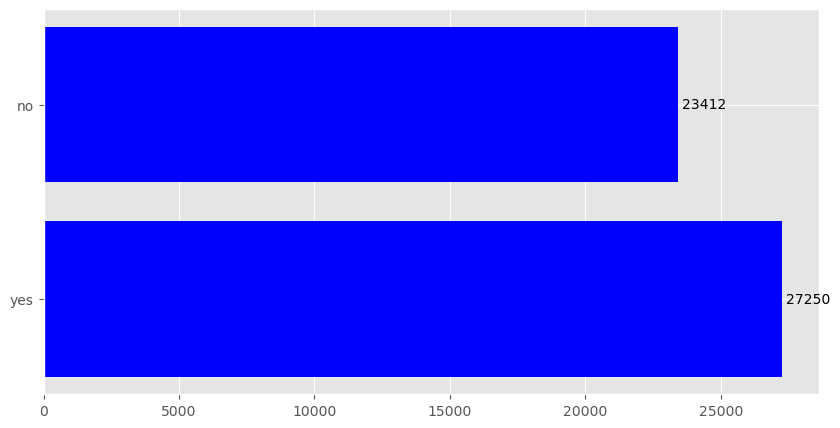

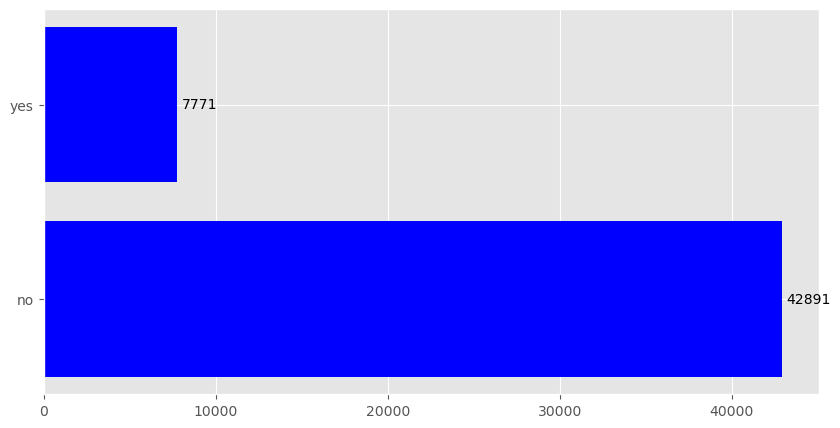

In [24]:
quick_plot(customers_cleaned['housing'])
quick_plot(customers_cleaned['has_tv_package'])

In [22]:
display(customers_cleaned[customers_cleaned['has_tv_package'] == 'n'])
customers_cleaned['has_tv_package'] = customers_cleaned['has_tv_package'].replace('n', 'no')
display(customers_cleaned[customers_cleaned['has_tv_package'] == 'n'])


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
18,23771239,Milton Keynes,UK,32,management,married,tertiary,no,0.62,yes,n,telephone,2,13,nov,1,-1,0,unknown,no
971,56724125,Cheltenham,UK,34,technician,married,tertiary,no,1.97,no,n,cellular,2,20,aug,3,-1,0,unknown,yes
3106,40345744,Bristol,UK,30,management,single,tertiary,no,5.72,no,n,cellular,5,17,jun,3,183,2,success,yes
4782,96633301,Leicester,UK,60,retired,divorced,secondary,no,0.01,no,n,cellular,3,19,feb,1,184,1,success,yes
7548,86728502,Birmingham,UK,75,retired,married,primary,no,33.24,no,n,cellular,1,2,feb,1,-1,0,unknown,no


,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign


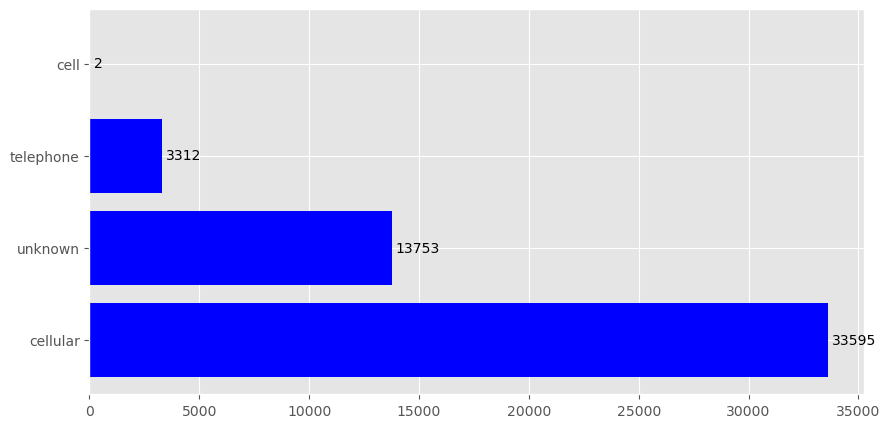

In [23]:
quick_plot(customers_cleaned['last_contact'])

In [ ]:
display(customers_cleaned[customers_cleaned['last_contact'] == 'cell'])
customers_cleaned['last_contact'] = customers_cleaned['last_contact'].replace('cell', 'cellular')
display(customers_cleaned[customers_cleaned['last_contact'] == 'cell'])

In [ ]:
quick_plot(customers_cleaned['conn_tr'])

In [ ]:
quick_plot(customers_cleaned['last_contact_this_campaign_month'])

In [ ]:
display(customers_cleaned[customers_cleaned['last_contact_this_campaign_month'] == 'j'])
customers_cleaned.drop(customers_cleaned[customers_cleaned['last_contact_this_campaign_month'] == 'j'].index, inplace=True)
display(customers_cleaned[customers_cleaned['last_contact_this_campaign_month'] == 'j'])


In [ ]:
fig, ax = plt.subplots(figsize =(10, 5))
hist = ax.hist(customers_cleaned['this_campaign'], color='blue', width=5)
plt.show()

display(customers_cleaned[customers_cleaned['this_campaign'].map(customers_cleaned['this_campaign'].value_counts()) == 1])


In [ ]:
bin_width = 1
bins = np.arange(min(customers_cleaned['this_campaign']), max(customers_cleaned['this_campaign']) + bin_width, bin_width)

fig, ax = plt.subplots(figsize =(10, 5))
hist = ax.hist(customers_cleaned['this_campaign'], bins=bins, color='blue', edgecolor='black')
plt.show()


In [ ]:
quick_plot(customers_cleaned['outcome_previous_campaign'])

In [ ]:
bin_width = 30
bins = np.arange(min(customers_cleaned['days_since_last_contact_previous_campaign']), max(customers_cleaned['days_since_last_contact_previous_campaign']) + bin_width, bin_width)

fig, ax = plt.subplots(figsize =(10, 5))
hist = ax.hist(customers_cleaned['days_since_last_contact_previous_campaign'], bins=bins, color='blue', edgecolor='black')
plt.show()

display(customers_cleaned[customers_cleaned['days_since_last_contact_previous_campaign'] == -1])

In [ ]:
bin_width = 1
bins = np.arange(min(customers_cleaned['contacted_during_previous_campaign']), max(customers_cleaned['contacted_during_previous_campaign']) + bin_width, bin_width)

fig, ax = plt.subplots(figsize =(10, 5))
hist = ax.hist(customers_cleaned['contacted_during_previous_campaign'], bins=bins, color='blue', edgecolor='black')
plt.show()

display(customers_cleaned[customers_cleaned['contacted_during_previous_campaign'] == 0])


In [ ]:
customers_cleaned.drop(customers_cleaned[customers_cleaned['contacted_during_previous_campaign'] > 60].index, inplace=True)
display(customers_cleaned[customers_cleaned['contacted_during_previous_campaign'] > 60])


In [ ]:
quick_plot(customers_cleaned['new_contract_this_campaign'])

## Feature Selection

- Before and after table of variables with discrete, continuous, categorical identification



## Training & Validation & Test Split

In [ ]:
# Drop or Exclude features


files.display_file_summary(customers_cleaned, name=file_name)


# Drop features not used in model training
drop_features = ['country', 'conn_tr']
customers_cleaned.drop(drop_features, axis=1, inplace=True)

files.display_file_summary(customers_cleaned, name=file_name)

In [ ]:
# Select the desired features and the target variable
targetName="new_contract_this_campaign"
featureNames=df.columns[df.columns != targetName]

X = df[featureNames]
y = df[targetName]

?? K-fold validation ... validation and test data split?

In [ ]:
# Simple split of training and testing data, 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Preprocessing

In [ ]:
# Categorical values - Convert to numerical and encode
- town
- country
- job
- married
- education
- arrears
- housing
- has_tv_package
- last_contact
- outcome_previous_campaign
- new_contract_this_campaign .... target

